# Classes de Municípios por Nível de Integração

## Preparação do Notebook

* Importação das principais bibliotecas
* Configuração das operações por default (estilos e tamanhos de gráficos)
* Referenciamento das subpastas do projeto

In [1]:
# importação de bibliotecas básicas

import pandas as pd # Biblioteca para operação avançada com dados tabulares de diversos tipos
import numpy as np # Biblioteca para operação com vetores de auto desempenho e um tipo por vez
from matplotlib import use as mpl_use # Função Matplotlib que estabelece backend e precisa ser chamda antes do plt
mpl_use('nbagg') # uso do backend "nbagg" para os gráficos terem paineis interativos
import matplotlib.pyplot as plt # Biblioteca para geração de gráficos de menor nível de abstração
import seaborn as sns # Biblioteca baseada em matplotlib para geração de gráficos e estilização, com maior nível de abstração
import geopandas as gpd # Biblioteca de análise geográfica
import descartes # Dependência do Geopandas para poder gerar mapas
import matplotlib 
import os

In [268]:
# configurações das operações por default

# Configuração de DataFrame Pandas para formato numérico com duas casas decimais quando a coluna for float
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Apresentação dos gráficos no interior das células
%matplotlib inline 
plt.style.use('ggplot') # Apresentação dos gráficos
plt.rcParams['figure.figsize'] = [20,10]
# Códigos abaixo são configurações que deixo por opção, caso se tornem úteis em alguma operação
# Configuração das Células para que apresentam múltiplos resultados em vez de apenas o último 
# InteractiveShell.ast_node_interactivity = "all"
# sns.set() # Configuração de Gráficos para padrão de formatação básica da biblioteca Seaborn

## kmeans

Preciso tratar a questão das metrópoles

Talvez todas as metrópoles, inclusive São Paulo, devam ter um mesmo código. Talvez não.

Uma coisas que é importante é que o código metrópole não se refira somente ao polo metropolitano, mas aos municípios a ele mais integrados. talvez, seja preciso um código condicao metropolitana 2, 1, 0 para 2 é o polo, 1 é o municipio participante da aglomeracao e 0 são municípios que não fazem parte de espaço metropolitano. No entanto, isso deve necessitar ser tratado por OneHotEnconding

In [99]:
df_fatores_geograficos = pd.read_csv('fatores_para_k_means.csv', decimal=',', encoding='utf-16', sep=';')

In [100]:
df_fatores_geograficos

,cod_mun,UF,Município,pop2019,pib2017milreais,export_fob_2019,import_fob_2019,pip_per_capita17,hierarquia_urbana07,hierarquia,...,dia3003,dia3103,dia0104,dia0204,dia0304,dia0404,dia0504,data_primeiro_caso,data_padrao,dias_contaminação_referencia
0,1100015,RO,Alta Floresta D'Oeste,22945,498864,198695,13294,1961,Centro Local,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
1,1100023,RO,Ariquemes,107863,2296074,38002769,738809,2139,Centro Subregional B,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
2,1100031,RO,Cabixi,5312,138894,137660,0,2232,Centro Local,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
3,1100049,RO,Cacoal,85359,2127523,20514957,53854,2404,Centro Subregional B,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
4,1100056,RO,Cerejeiras,16323,448524,97838806,59259,2501,Centro de Zona B,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,GO,Vianópolis,13863,395787,0,0,2894,Centro Local,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
5566,5222054,GO,Vicentinópolis,8743,350765,6518444,0,4177,Centro Local,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
5567,5222203,GO,Vila Boa,6171,137500,0,0,2399,Centro Local,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
5568,5222302,GO,Vila Propício,5821,182175,0,0,3202,Centro Local,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN


In [383]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

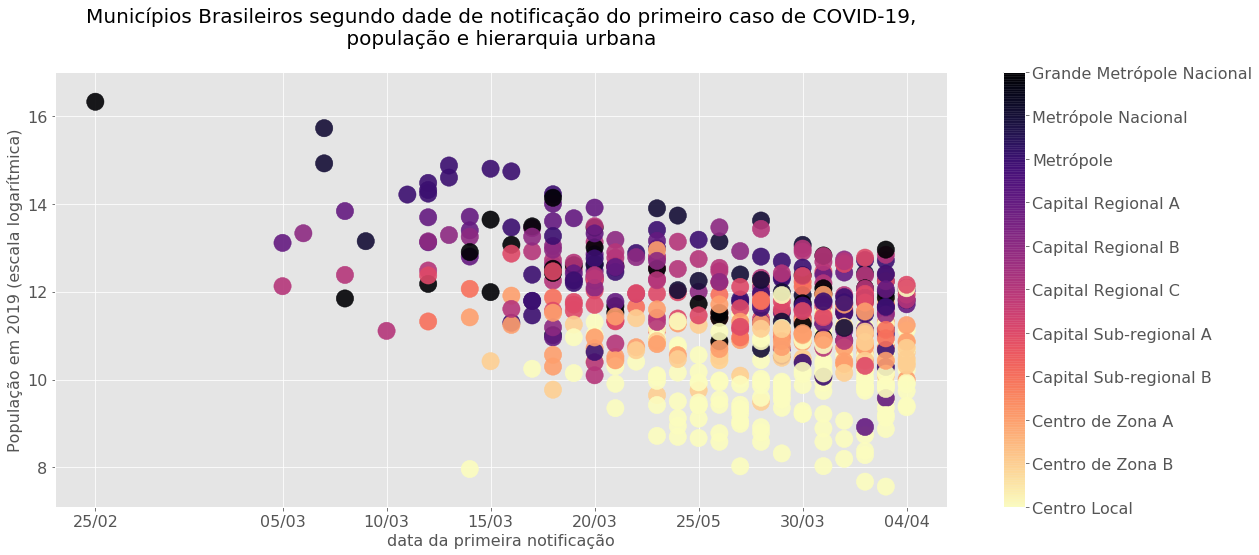

In [368]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('magma')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['hierarquia'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=np.log(df_fatores_geograficos.pop2019[filtro_dias]),
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo dade de notificação do primeiro caso de COVID-19,\n população e hierarquia urbana \n')
teste = plt.colorbar(ticks=[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,  11])
# teste.set_label('Hierarquia Urbana', rotation=270)
teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('data da primeira notificação')
plt.ylabel('População em 2019 (escala logarítmica)');
plt.ylim(top=17)

plt.xticks([1, 10, 15, 20, 25, 30, 35, 40], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])
plt.savefig('covid_pop_hierarquia.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

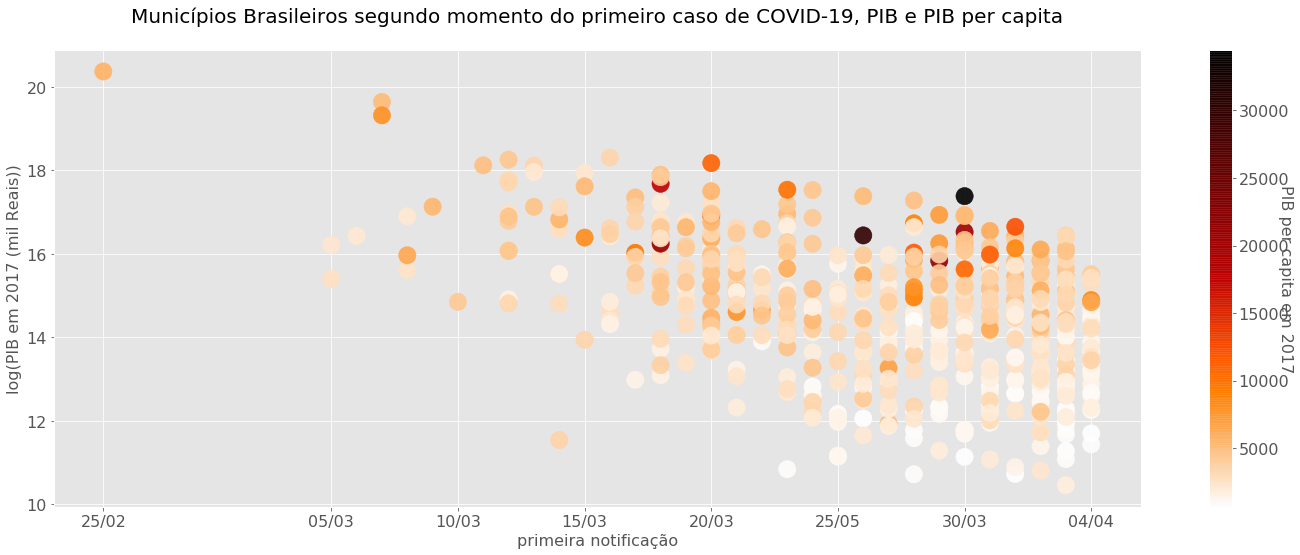

In [370]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('gist_heat')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['pip_per_capita17'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=np.log(df_fatores_geograficos.pib2017milreais[filtro_dias]),
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo momento do primeiro caso de COVID-19, PIB e PIB per capita\n')

teste = plt.colorbar()
teste.set_label('PIB per capita em 2017', rotation=270)
#teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação')
plt.ylabel('log(PIB em 2017 (mil Reais))');

plt.tight_layout()

plt.xticks([1, 10, 15, 20, 25, 30, 35, 40], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])
plt.savefig('covid_pib_pibpercapita.png')

#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

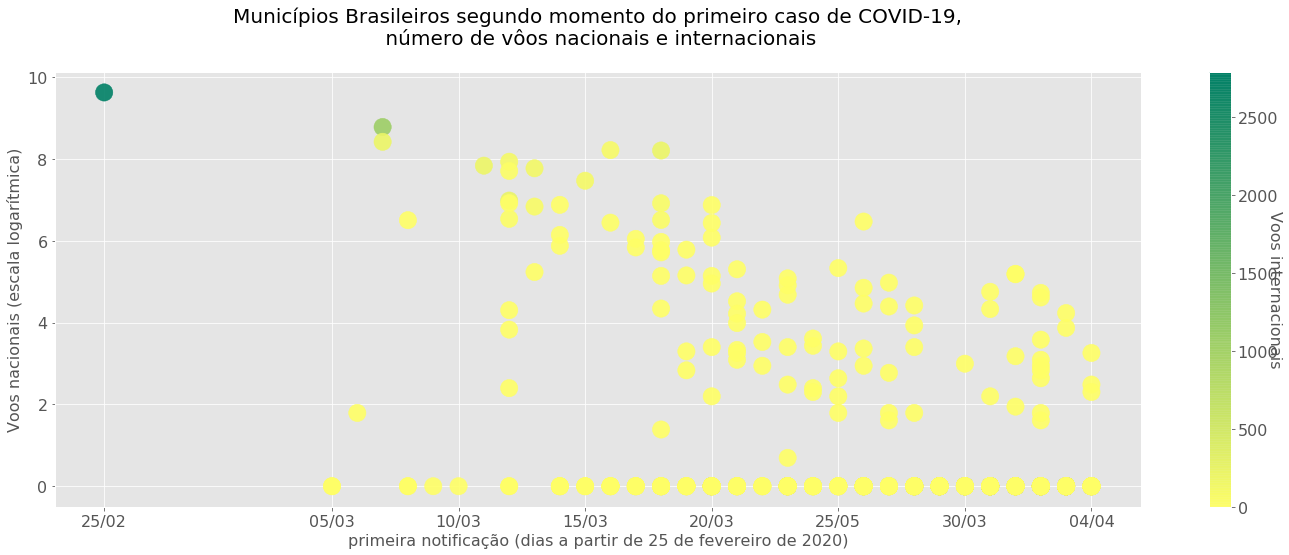

In [371]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('summer')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['voos_int'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=np.log(df_fatores_geograficos.voos_dom[filtro_dias] + 1),
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo momento do primeiro caso de COVID-19,\n número de vôos nacionais e internacionais\n')

teste = plt.colorbar()
teste.set_label('Voos internacionais', rotation=270)
#teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação (dias a partir de 25 de fevereiro de 2020)')
plt.ylabel('Voos nacionais (escala logarítmica)');

plt.tight_layout()

plt.xticks([1, 10, 15, 20, 25, 30, 35, 40], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])
plt.savefig('covid_voos.png')

#plt.savefig('covid.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

C:\Users\Acer A315\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


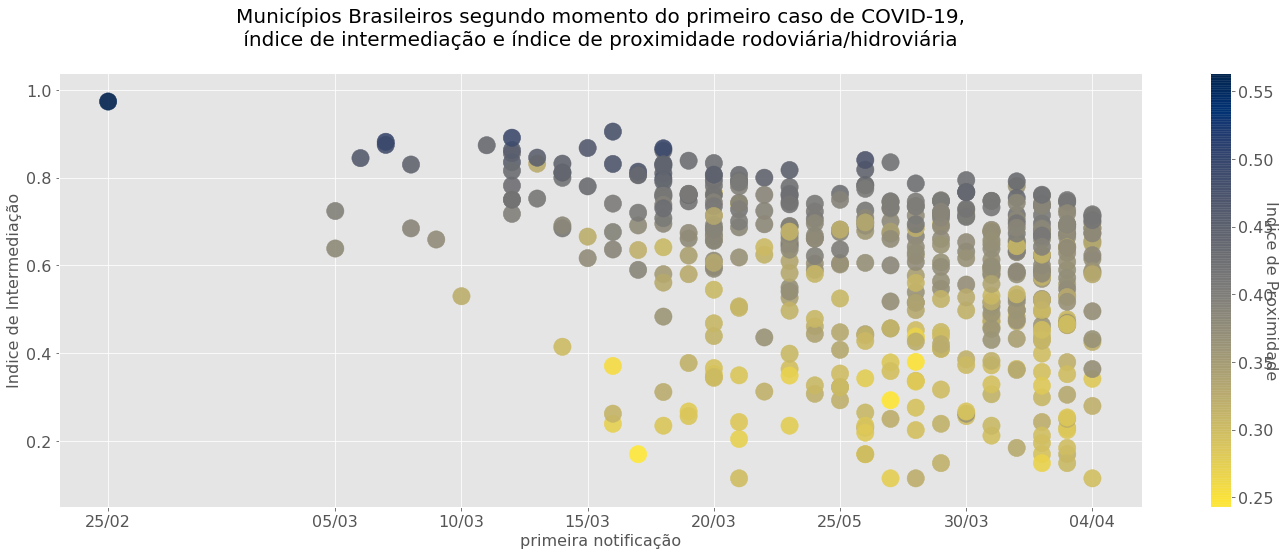

In [372]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('cividis')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['indice_proximidade'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=(np.log(df_fatores_geograficos.indice_intermediacao[filtro_dias]*1000000000))/20,
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo momento do primeiro caso de COVID-19,\n índice de intermediação e índice de proximidade rodoviária/hidroviária \n')

teste = plt.colorbar()
teste.set_label('Indice de Proximidade', rotation=270)
#teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação')
plt.ylabel('Indice de Intermediação');

plt.tight_layout()

plt.xticks([1, 10, 15, 20, 25, 30, 35, 40], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])
plt.savefig('covid_indice_intermediacao.png')


#plt.savefig('covid.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

In [209]:
df_fatores_geograficos.columns

Index(['cod_mun', 'UF', 'Município', 'pop2019', 'pib2017milreais',
       'export_fob_2019', 'import_fob_2019', 'pip_per_capita17',
       'hierarquia_urbana07', 'hierarquia', 'voos_dom', 'voos_int',
       'indice_proximidade', 'indice_intermediacao', 'cod_mun.1',
       'peso_integracao_interna', 'peso_integracao_geral', 'dia2502',
       'dia2902', 'dia0403', 'dia0503', 'dia0603', 'dia0703', 'dia0803',
       'dia0903', 'dia1003', 'dia1103', 'dia1203', 'dia1303', 'dia1403',
       'dia1503', 'dia1603', 'dia1703', 'dia1803', 'dia1903', 'dia2003',
       'dia2103', 'dia2203', 'dia2303', 'dia2403', 'dia2503', 'dia2603',
       'dia2703', 'dia2803', 'dia2903', 'dia3003', 'dia3103', 'dia0104',
       'dia0204', 'dia0304', 'dia0404', 'dia0504', 'data_primeiro_caso',
       'data_padrao', 'dias_contaminação_referencia'],
      dtype='object')

In [112]:
df_fatores_geograficos.dia3103[df_fatores_geograficos.dia3103 != 0].count(), df_fatores_geograficos.dia3103[df_fatores_geograficos.dia3003 != 0].count()

(396, 353)

In [118]:
df_covid_19_br = pd.read_csv('base_covid_atualizada.csv', decimal=',', sep=';', encoding='utf-16')

In [119]:
df_covid_19_br

,Unnamed: 0,cod_mun,municipio,estado,data,novos_casos,casos_total
0,0,3550308,São Paulo,SP,2020-02-25,1,1
1,2,3550308,São Paulo,SP,2020-02-29,1,2
2,4,3550308,São Paulo,SP,2020-03-04,1,3
3,6,3550308,São Paulo,SP,2020-03-05,3,6
4,7,3300407,Barra Mansa,RJ,2020-03-05,1,1
...,...,...,...,...,...,...,...
6070,6104,3303708,Paraíba do Sul,RJ,2020-04-05,0,2
6071,6105,3302858,Mesquita,RJ,2020-04-05,0,1
6072,6106,3303401,Nova Friburgo,RJ,2020-04-05,0,1
6073,6107,42,NÃO ESPECIFICADA,SC,2020-04-05,0,23


In [148]:
teste = df_fatores_geograficos.loc[:, ['cod_mun','hierarquia_urbana07']].iterrows()

In [157]:
dic_mapeamento_hierarquias = {}
for linha in df_fatores_geograficos.loc[:, ['cod_mun','hierarquia_urbana07']].iterrows():
    dic_mapeamento_hierarquias[linha[1]['cod_mun']] = linha[1]['hierarquia_urbana07']

In [165]:
df_covid_19_br['hierarquia_urbana'] = df_covid_19_br.cod_mun.map(dic_mapeamento_hierarquias)

C:\Users\Acer A315\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [172]:
df_covid_19_br.pivot_table?

In [173]:
df_para_plot = df_covid_19_br.pivot_table(index='data', columns='hierarquia_urbana', values='casos_total', aggfunc='count')

In [176]:
df_para_plot = df_para_plot.fillna(0)

In [185]:
df_para_plot = df_para_plot[['Grande Metrópole Nacional', 'Metrópole Nacional', 'Metrópole',
             'Capital Regional A', 'Capital Regional B', 'Capital Regional C',
             'Centro Subregional A', 'Centro Subregional B',
             'Centro de Zona A', 'Centro de Zona B', 'Centro Local']]

In [190]:
df_para_plot2 = df_para_plot.copy()
for hierarquia, total in zip(['Grande Metrópole Nacional', 'Metrópole Nacional', 'Metrópole','Capital Regional A', 'Capital Regional B', 'Capital Regional C','Centro Subregional A', 'Centro Subregional B','Centro de Zona A', 'Centro de Zona B', 'Centro Local'], [47, 29, 101, 60, 46, 83, 85, 79, 197, 364, 4479]):
    df_para_plot2[hierarquia] = df_para_plot2[hierarquia] / total
df_para_plot2

hierarquia_urbana,Grande Metrópole Nacional,Metrópole Nacional,Metrópole,Capital Regional A,Capital Regional B,Capital Regional C,Centro Subregional A,Centro Subregional B,Centro de Zona A,Centro de Zona B,Centro Local
data,,,,,,,,,,,
2020-02-25,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-29,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-04,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-05,0.021277,0.000000,0.000000,0.016667,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-06,0.021277,0.000000,0.000000,0.016667,0.021739,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-07,0.021277,0.068966,0.000000,0.016667,0.021739,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-08,0.042553,0.068966,0.000000,0.033333,0.021739,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-09,0.042553,0.103448,0.000000,0.033333,0.021739,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-10,0.042553,0.103448,0.000000,0.033333,0.021739,0.036145,0.000000,0.000000,0.000000,0.000000,0.000000


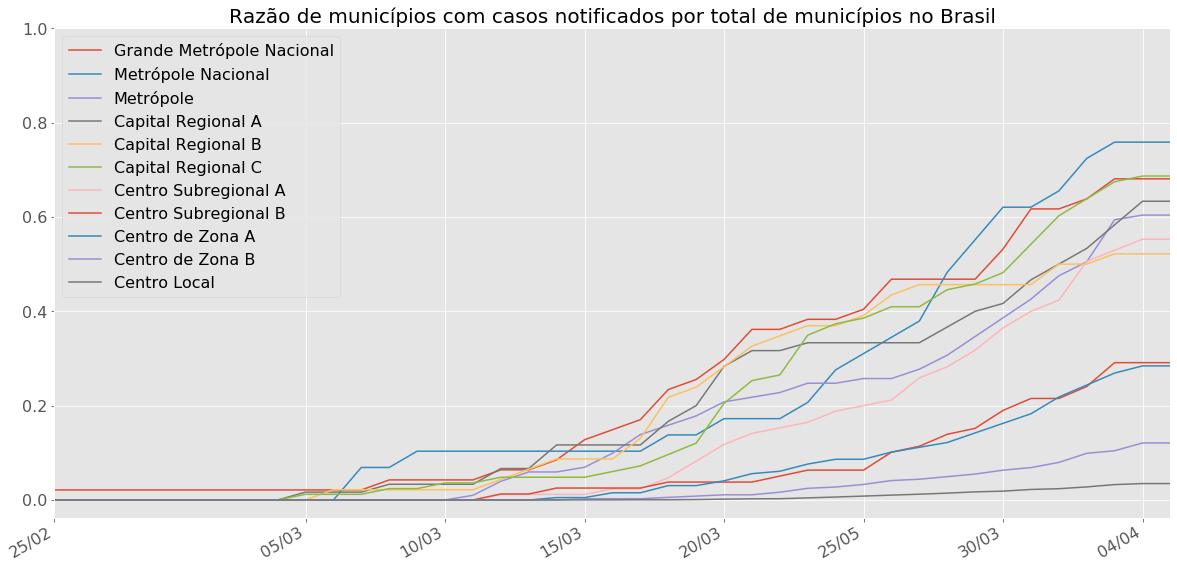

In [379]:
for coluna in ['Grande Metrópole Nacional', 'Metrópole Nacional', 'Metrópole','Capital Regional A', 'Capital Regional B', 'Capital Regional C','Centro Subregional A', 'Centro Subregional B','Centro de Zona A', 'Centro de Zona B', 'Centro Local']:
    df_para_plot2[coluna].plot()
plt.legend()
plt.title('Razão de municípios com casos notificados por total de municípios no Brasil')
plt.xticks(['2020-02-25', '2020-03-05', '2020-03-10', '2020-03-15', '2020-03-20', '2020-03-25', '2020-03-30', '2020-04-04'], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])
plt.xlabel("")
plt. ylim(top=1)

plt.savefig('ritmos.png')

In [196]:
df_para_plot_pr = df_covid_19_br[df_covid_19_br['estado'] == 'PR'].pivot_table(index='data', columns='hierarquia_urbana', values='casos_total', aggfunc='count')

In [ ]:
df_para_plot_pr = df_para_plot_pr.fillna(0)

In [199]:
df_para_plot_pr

hierarquia_urbana,Capital Regional B,Capital Regional C,Centro Local,Centro Subregional A,Centro Subregional B,Centro de Zona A,Centro de Zona B,Metrópole
data,,,,,,,,
2020-03-12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-03-13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-03-14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-03-15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-03-16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-03-17,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2020-03-18,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
2020-03-19,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
2020-03-20,2.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0


In [200]:
df_para_plot_pr = df_para_plot_pr[['Metrópole','Capital Regional B', 'Capital Regional C','Centro Subregional A', 'Centro Subregional B','Centro de Zona A', 'Centro de Zona B', 'Centro Local']]

In [202]:
df_para_plot_pr2 = df_para_plot_pr.copy()
for hierarquia, total in zip(['Metrópole','Capital Regional B', 'Capital Regional C','Centro Subregional A', 'Centro Subregional B','Centro de Zona A', 'Centro de Zona B', 'Centro Local'], [47, 29, 101, 60, 46, 83, 85, 79, 197, 364, 4479]):
    df_para_plot_pr2[hierarquia] = df_para_plot_pr2[hierarquia] / total
df_para_plot2

hierarquia_urbana,Grande Metrópole Nacional,Metrópole Nacional,Metrópole,Capital Regional A,Capital Regional B,Capital Regional C,Centro Subregional A,Centro Subregional B,Centro de Zona A,Centro de Zona B,Centro Local
data,,,,,,,,,,,
2020-02-25,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-29,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-04,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-05,0.021277,0.000000,0.000000,0.016667,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-06,0.021277,0.000000,0.000000,0.016667,0.021739,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-07,0.021277,0.068966,0.000000,0.016667,0.021739,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-08,0.042553,0.068966,0.000000,0.033333,0.021739,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-09,0.042553,0.103448,0.000000,0.033333,0.021739,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-10,0.042553,0.103448,0.000000,0.033333,0.021739,0.036145,0.000000,0.000000,0.000000,0.000000,0.000000


In [240]:
plt.legend?

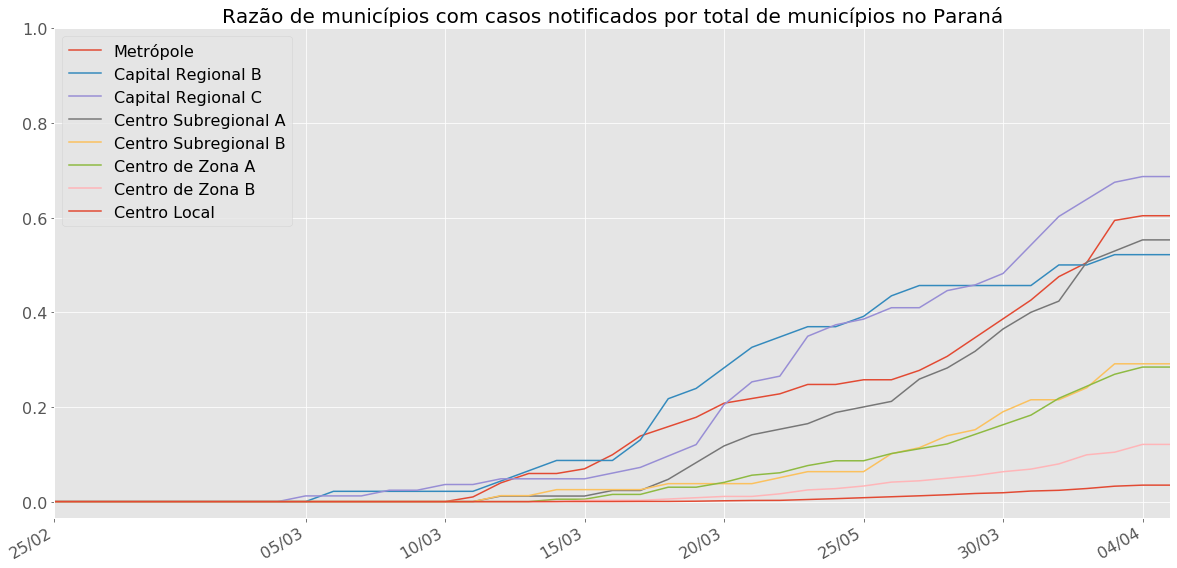

In [385]:
for coluna in ['Metrópole','Capital Regional B', 'Capital Regional C','Centro Subregional A', 'Centro Subregional B','Centro de Zona A', 'Centro de Zona B', 'Centro Local']:
    df_para_plot2[coluna].plot()
plt.legend(loc='upper left')


plt.title('Razão de municípios com casos notificados por total de municípios no Paraná')
plt.xticks(['2020-02-25', '2020-03-05', '2020-03-10', '2020-03-15', '2020-03-20', '2020-03-25', '2020-03-30', '2020-04-04'], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])
plt.xlabel("")


plt.ylim(top=1)
plt.savefig('ritmos_pr.png')

In [123]:
filter_len_cod_mun = df_covid_19_br.cod_mun.astype('str').str.len() == 2


df_covid_19_br = df_covid_19_br[~filter_len_cod_mun]

,Unnamed: 0,cod_mun,municipio,estado,data,novos_casos,casos_total
0,0,3550308,São Paulo,SP,2020-02-25,1,1
1,2,3550308,São Paulo,SP,2020-02-29,1,2
2,4,3550308,São Paulo,SP,2020-03-04,1,3
3,6,3550308,São Paulo,SP,2020-03-05,3,6
4,7,3300407,Barra Mansa,RJ,2020-03-05,1,1
...,...,...,...,...,...,...,...
6068,6102,2112209,Timon,MA,2020-04-05,0,2
6069,6103,1600501,Oiapoque,AP,2020-04-05,0,1
6070,6104,3303708,Paraíba do Sul,RJ,2020-04-05,0,2
6071,6105,3302858,Mesquita,RJ,2020-04-05,0,1


In [125]:
df_covid_19_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 6072
Data columns (total 7 columns):
Unnamed: 0     5856 non-null int64
cod_mun        5856 non-null int64
municipio      5856 non-null object
estado         5856 non-null object
data           5856 non-null object
novos_casos    5856 non-null int64
casos_total    5856 non-null int64
dtypes: int64(4), object(3)
memory usage: 366.0+ KB


In [128]:
df_covid_19_br.data = pd.to_datetime(df_covid_19_br.data)

C:\Users\Acer A315\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


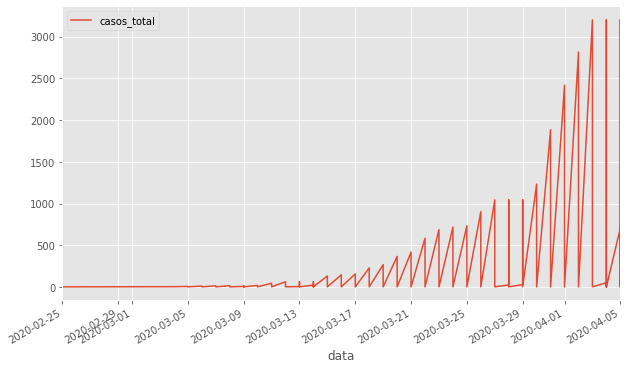

In [136]:
df_covid_19_br.plot('data', 'casos_total')

In [127]:
pd.to_datetime(df_covid_19_br.data)

0      2020-02-25
1      2020-02-29
2      2020-03-04
3      2020-03-05
4      2020-03-05
          ...    
6068   2020-04-05
6069   2020-04-05
6070   2020-04-05
6071   2020-04-05
6072   2020-04-05
Name: data, Length: 5856, dtype: datetime64[ns]

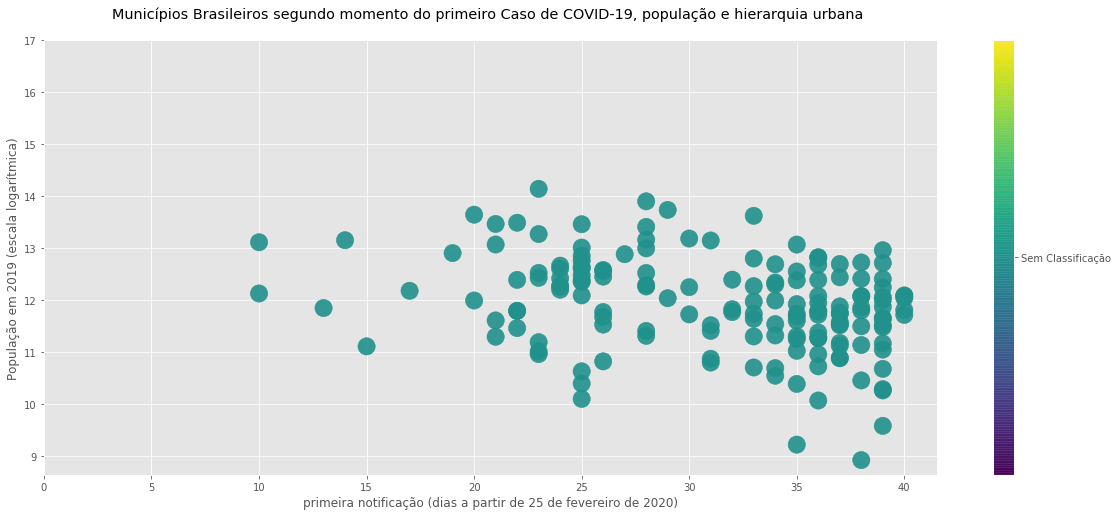

In [84]:
filtro_dias_hierarquia = (df_fatores_geograficos.dias_contaminação_referencia >= 0) & (df_fatores_geograficos.hierarquia > 0)
filtro_dias_sem_hierarquia = (df_fatores_geograficos.dias_contaminação_referencia >= 0) & (df_fatores_geograficos.hierarquia == 0)


fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('magma')
color_map = color_map.reversed()


scatter = plt.scatter(c=df_fatores_geograficos['hierarquia'][filtro_dias_sem_hierarquia], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias_sem_hierarquia],
            y=np.log(df_fatores_geograficos.pop2019[filtro_dias_sem_hierarquia]),
            alpha=0.9,
            s= 300);


ax.set_title('Municípios Brasileiros segundo momento do primeiro Caso de COVID-19, população e hierarquia urbana \n')
teste = plt.colorbar(ticks=[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,  11])
# teste.set_label('Hierarquia Urbana', rotation=270)
teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação (dias a partir de 25 de fevereiro de 2020)')
plt.ylabel('População em 2019 (escala logarítmica)');
plt.xlim(left=0)
plt.ylim(top=17)

plt.savefig('covid.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

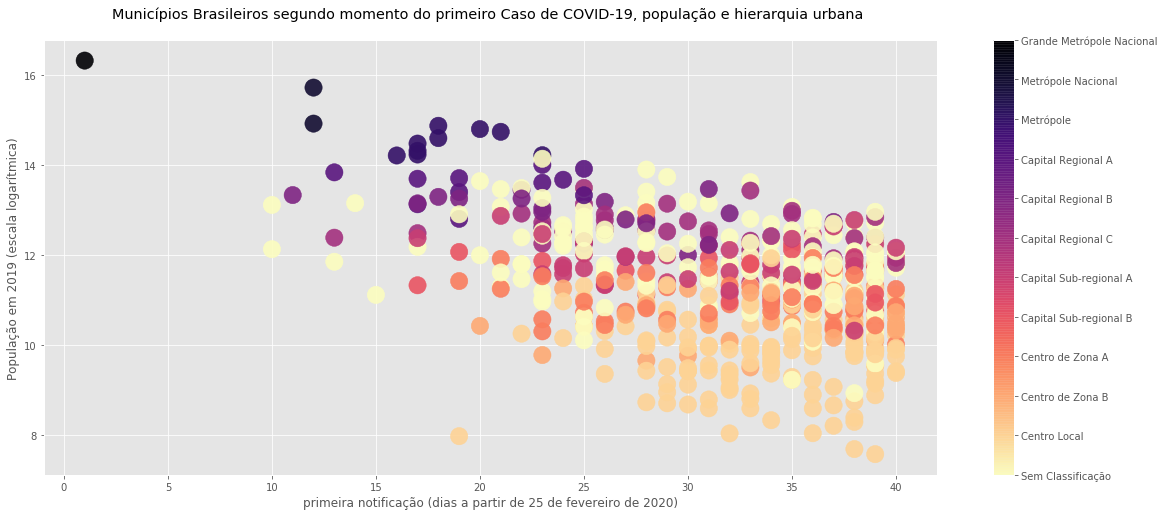

In [56]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('magma')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['hierarquia'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=np.log(df_fatores_geograficos.pop2019[filtro_dias]),
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo momento do primeiro Caso de COVID-19, população e hierarquia urbana \n')
teste = plt.colorbar(ticks=[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,  11])
# teste.set_label('Hierarquia Urbana', rotation=270)
teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação (dias a partir de 25 de fevereiro de 2020)')
plt.ylabel('População em 2019 (escala logarítmica)');


plt.savefig('covid.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

In [249]:
df_fatores_geograficos.columns

Index(['cod_mun', 'UF', 'Município', 'pop2019', 'pib2017milreais',
       'export_fob_2019', 'import_fob_2019', 'pip_per_capita17',
       'hierarquia_urbana07', 'hierarquia', 'voos_dom', 'voos_int',
       'indice_proximidade', 'indice_intermediacao', 'cod_mun.1',
       'peso_integracao_interna', 'peso_integracao_geral', 'dia2502',
       'dia2902', 'dia0403', 'dia0503', 'dia0603', 'dia0703', 'dia0803',
       'dia0903', 'dia1003', 'dia1103', 'dia1203', 'dia1303', 'dia1403',
       'dia1503', 'dia1603', 'dia1703', 'dia1803', 'dia1903', 'dia2003',
       'dia2103', 'dia2203', 'dia2303', 'dia2403', 'dia2503', 'dia2603',
       'dia2703', 'dia2803', 'dia2903', 'dia3003', 'dia3103', 'dia0104',
       'dia0204', 'dia0304', 'dia0404', 'dia0504', 'data_primeiro_caso',
       'data_padrao', 'dias_contaminação_referencia'],
      dtype='object')

In [250]:
df_fatores_geograficos[df_fatores_geograficos['dia0504'] >0][['pib2017milreais','dia0504']].corr()

,pib2017milreais,dia0504
pib2017milreais,1.00000,0.94548
dia0504,0.94548,1.00000


In [247]:
df_fatores_geograficos[df_fatores_geograficos['dia0504'] >0][['pop2019','dia0504']].corr()

,pop2019,dia0504
pop2019,1.000000,0.925966
dia0504,0.925966,1.000000


In [255]:
df_fatores_geograficos[df_fatores_geograficos['dia0504'] >0][['export_fob_2019', 'dia0504']].corr()

,export_fob_2019,dia0504
export_fob_2019,1.00000,0.33587
dia0504,0.33587,1.00000


In [256]:
df_fatores_geograficos[df_fatores_geograficos['dia0504'] >0][['import_fob_2019', 'dia0504']].corr()

,import_fob_2019,dia0504
import_fob_2019,1.000000,0.591616
dia0504,0.591616,1.000000


In [257]:
df_fatores_geograficos[df_fatores_geograficos['dia0504'] >0][['pip_per_capita17', 'dia0504']].corr()

,pip_per_capita17,dia0504
pip_per_capita17,1.000000,0.056812
dia0504,0.056812,1.000000


In [274]:
df_fatores_geograficos

,cod_mun,UF,Município,pop2019,pib2017milreais,export_fob_2019,import_fob_2019,pip_per_capita17,hierarquia_urbana07,hierarquia,...,dia3003,dia3103,dia0104,dia0204,dia0304,dia0404,dia0504,data_primeiro_caso,data_padrao,dias_contaminação_referencia
0,1100015,RO,Alta Floresta D'Oeste,22945,498864,198695,13294,1961,Centro Local,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2020-02-24,nan
1,1100023,RO,Ariquemes,107863,2296074,38002769,738809,2139,Centro Subregional B,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2020-02-24,nan
2,1100031,RO,Cabixi,5312,138894,137660,0,2232,Centro Local,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2020-02-24,nan
3,1100049,RO,Cacoal,85359,2127523,20514957,53854,2404,Centro Subregional B,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2020-02-24,nan
4,1100056,RO,Cerejeiras,16323,448524,97838806,59259,2501,Centro de Zona B,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2020-02-24,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,GO,Vianópolis,13863,395787,0,0,2894,Centro Local,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2020-02-24,nan
5566,5222054,GO,Vicentinópolis,8743,350765,6518444,0,4177,Centro Local,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2020-02-24,nan
5567,5222203,GO,Vila Boa,6171,137500,0,0,2399,Centro Local,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2020-02-24,nan
5568,5222302,GO,Vila Propício,5821,182175,0,0,3202,Centro Local,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2020-02-24,nan


In [ ]:
df_fatores_geograficos[df_fatores_geograficos['dia0504'] >0][['pip_per_capita17', 'dia0504']].corr()

In [275]:
df_fatores_geograficos_para_correlacao = pd.concat([df_fatores_geograficos[['cod_mun', 'UF', 'Município', 'pop2019', 'pib2017milreais',
       'export_fob_2019', 'import_fob_2019', 'pip_per_capita17',
       'hierarquia_urbana07', 'hierarquia', 'voos_dom', 'voos_int',
       'indice_proximidade', 'indice_intermediacao', 'dia0504']], df_fatores_geograficos[['dias_contaminação_referencia']]], axis='columns')

df_fatores_geograficos_para_correlacao

,cod_mun,UF,Município,pop2019,pib2017milreais,export_fob_2019,import_fob_2019,pip_per_capita17,hierarquia_urbana07,hierarquia,voos_dom,voos_int,indice_proximidade,indice_intermediacao,dia0504,dias_contaminação_referencia
0,1100015,RO,Alta Floresta D'Oeste,22945,498864,198695,13294,1961,Centro Local,1,0,0,0.30,0.00,0.00,nan
1,1100023,RO,Ariquemes,107863,2296074,38002769,738809,2139,Centro Subregional B,4,0,0,0.42,0.01,0.00,nan
2,1100031,RO,Cabixi,5312,138894,137660,0,2232,Centro Local,1,0,0,0.23,0.00,0.00,nan
3,1100049,RO,Cacoal,85359,2127523,20514957,53854,2404,Centro Subregional B,4,25,0,0.41,0.00,0.00,nan
4,1100056,RO,Cerejeiras,16323,448524,97838806,59259,2501,Centro de Zona B,2,0,0,0.31,0.00,0.00,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,GO,Vianópolis,13863,395787,0,0,2894,Centro Local,1,0,0,0.34,0.00,0.00,nan
5566,5222054,GO,Vicentinópolis,8743,350765,6518444,0,4177,Centro Local,1,0,0,0.33,0.00,0.00,nan
5567,5222203,GO,Vila Boa,6171,137500,0,0,2399,Centro Local,1,0,0,0.30,0.00,0.00,nan
5568,5222302,GO,Vila Propício,5821,182175,0,0,3202,Centro Local,1,0,0,0.34,0.00,0.00,nan


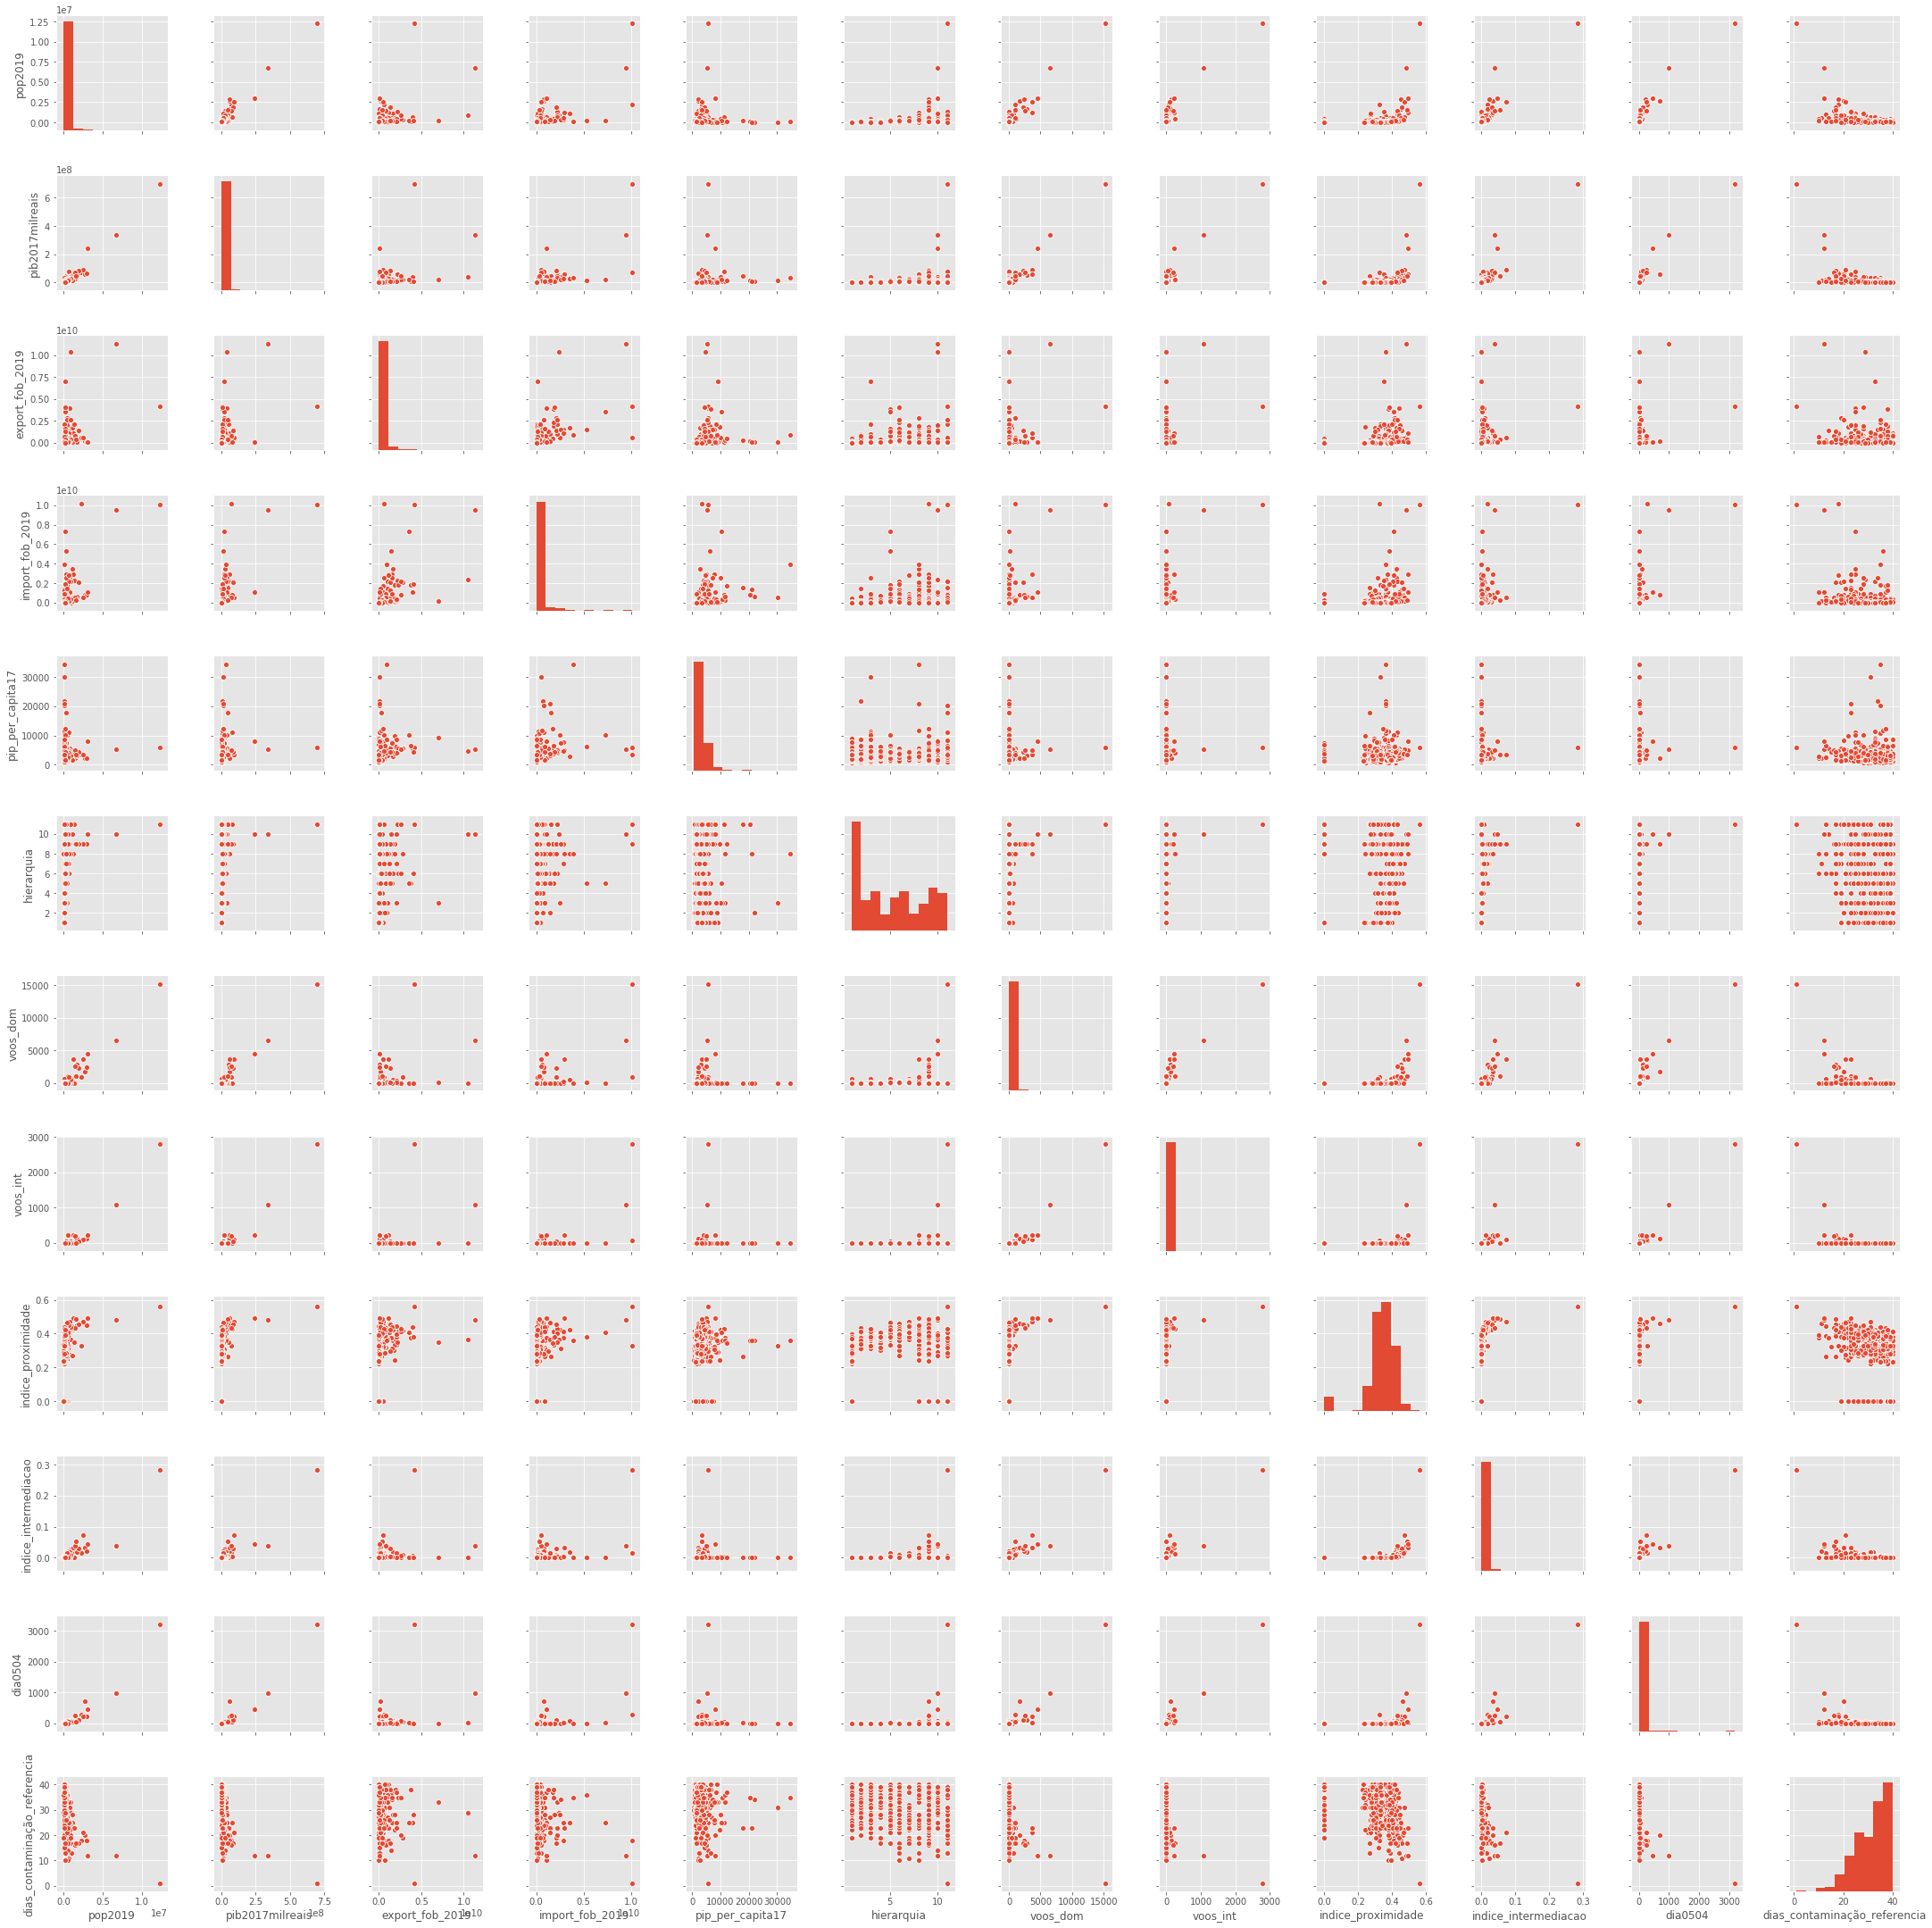

In [281]:
sns.pairplot((df_fatores_geograficos_para_correlacao.iloc[:,3:][df_fatores_geograficos_para_correlacao['dias_contaminação_referencia'] > 0]))

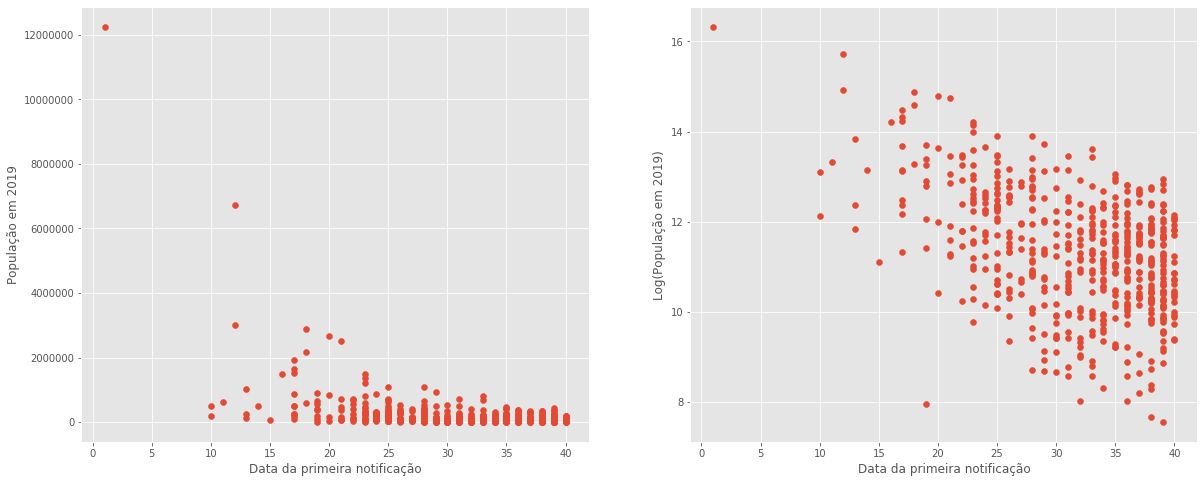

In [285]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

ax[0].scatter(y=df_fatores_geograficos['pop2019'][filtro_dias], x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[0].set_ylabel('População em 2019')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel('Data da primeira notificação')
ax[0].set_ylabel('População em 2019')


ax[1].scatter(y=np.log(df_fatores_geograficos['pop2019'][filtro_dias]), x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[1].set_xlabel('Data da primeira notificação')
ax[1].set_ylabel('Log(População em 2019)')
ax[1].set_xlabel('Data da primeira notificação');

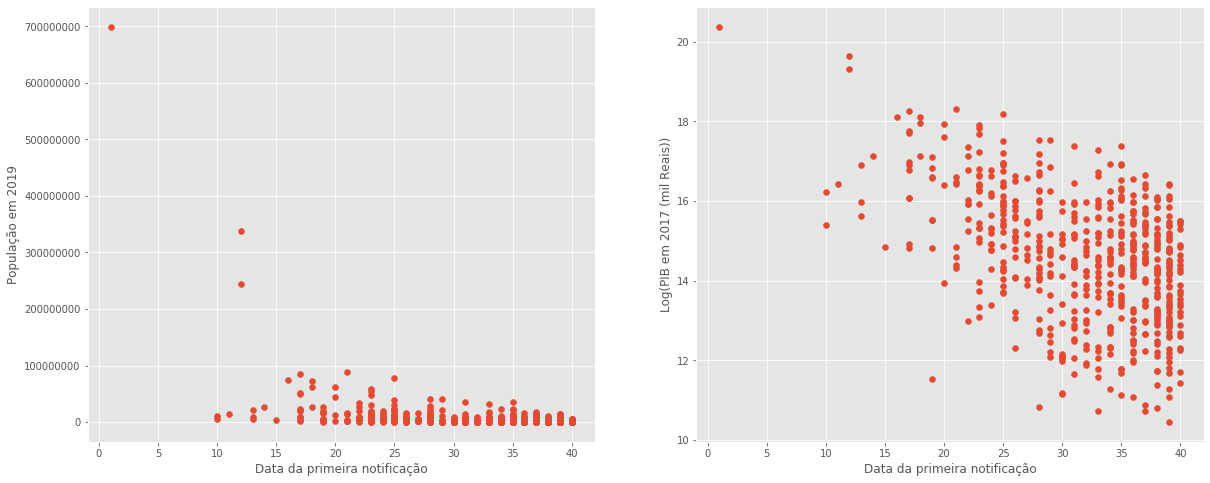

In [286]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

ax[0].scatter(y=df_fatores_geograficos['pib2017milreais'][filtro_dias], x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[0].set_ylabel('PIB em 2017 (mil Reais)')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel('Data da primeira notificação')
ax[0].set_ylabel('População em 2019')


ax[1].scatter(y=np.log(df_fatores_geograficos['pib2017milreais'][filtro_dias]), x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[1].set_xlabel('Data da primeira notificação')
ax[1].set_ylabel('Log(PIB em 2017 (mil Reais))')
ax[1].set_xlabel('Data da primeira notificação');

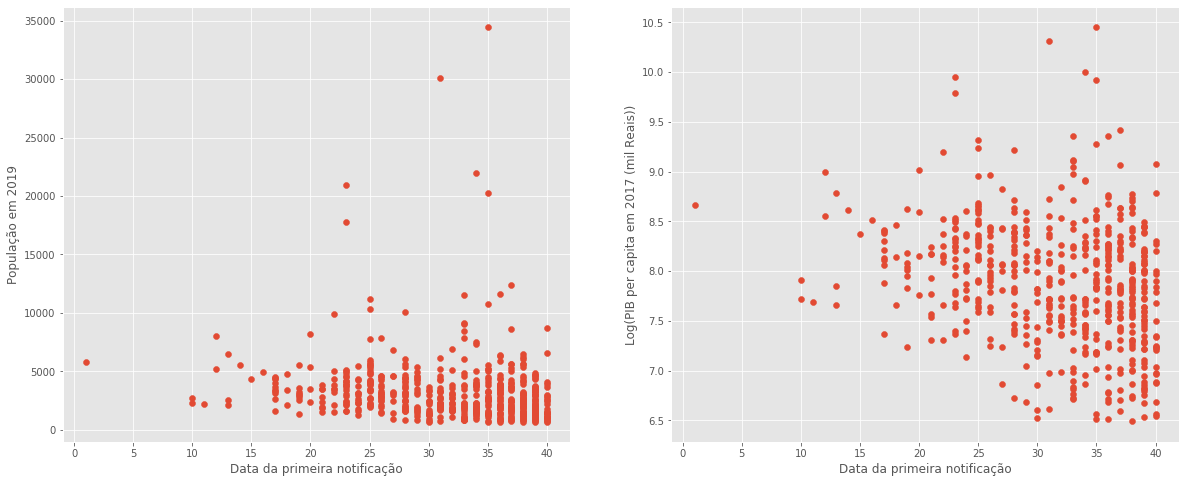

In [287]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

ax[0].scatter(y=df_fatores_geograficos['pip_per_capita17'][filtro_dias], x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[0].set_ylabel('PIB per capita em 2017 (mil Reais)')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel('Data da primeira notificação')
ax[0].set_ylabel('População em 2019')


ax[1].scatter(y=np.log(df_fatores_geograficos['pip_per_capita17'][filtro_dias]), x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[1].set_xlabel('Data da primeira notificação')
ax[1].set_ylabel('Log(PIB per capita em 2017 (mil Reais))')
ax[1].set_xlabel('Data da primeira notificação');

C:\Users\Acer A315\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


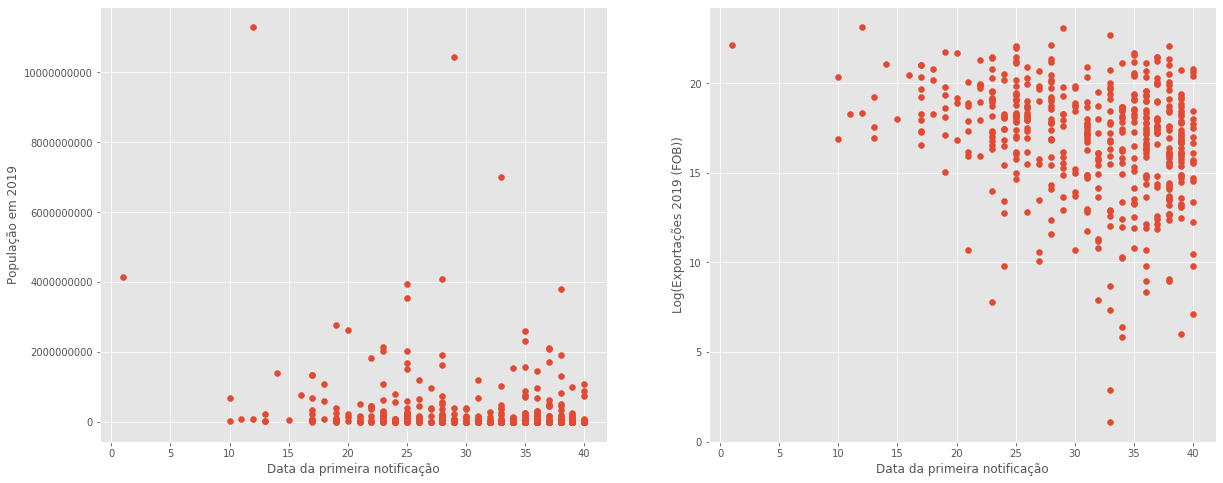

In [288]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

ax[0].scatter(y=df_fatores_geograficos['export_fob_2019'][filtro_dias], x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[0].set_ylabel('Exportações 2019 (FOB)')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel('Data da primeira notificação')
ax[0].set_ylabel('População em 2019')


ax[1].scatter(y=np.log(df_fatores_geograficos['export_fob_2019'][filtro_dias]), x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[1].set_xlabel('Data da primeira notificação')
ax[1].set_ylabel('Log(Exportações 2019 (FOB))')
ax[1].set_xlabel('Data da primeira notificação');

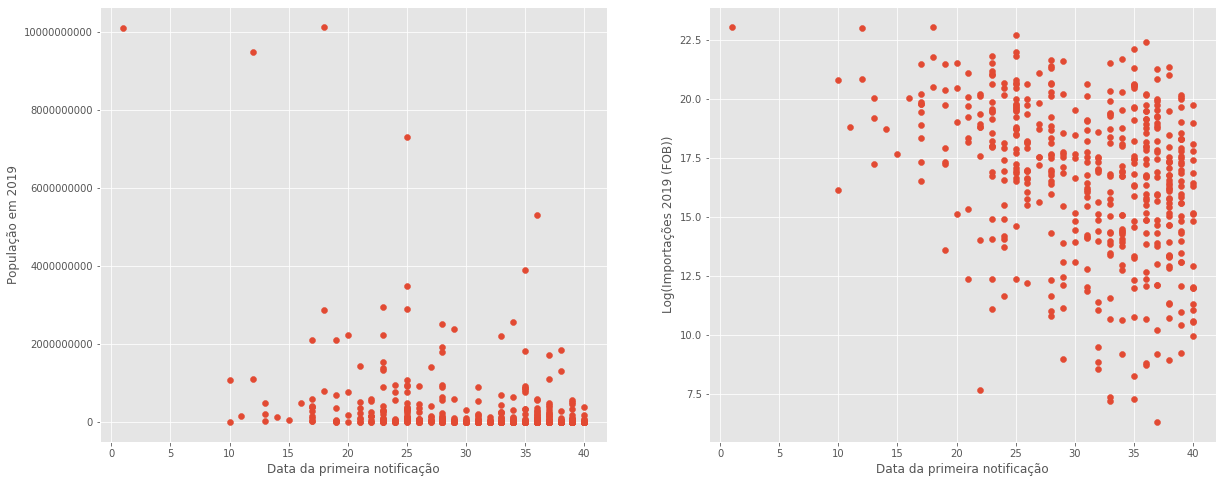

In [289]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

ax[0].scatter(y=df_fatores_geograficos['import_fob_2019'][filtro_dias], x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[0].set_ylabel('Importações 2019 (FOB)')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel('Data da primeira notificação')
ax[0].set_ylabel('População em 2019')


ax[1].scatter(y=np.log(df_fatores_geograficos['import_fob_2019'][filtro_dias]), x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[1].set_xlabel('Data da primeira notificação')
ax[1].set_ylabel('Log(Importações 2019 (FOB))')
ax[1].set_xlabel('Data da primeira notificação');

In [ ]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

ax[0].scatter(y=df_fatores_geograficos['import_fob_2019'][filtro_dias], x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[0].set_ylabel('Importações 2019 (FOB)')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel('Data da primeira notificação')
ax[0].set_ylabel('População em 2019')


ax[1].scatter(y=np.log(df_fatores_geograficos['import_fob_2019'][filtro_dias]), x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[1].set_xlabel('Data da primeira notificação')
ax[1].set_ylabel('Log(Importações 2019 (FOB))')
ax[1].set_xlabel('Data da primeira notificação');

In [319]:
df_fatores_geograficos[['peso_integracao_geral', 'peso_integracao_interna']].max()

peso_integracao_geral     0.00
peso_integracao_interna   0.00
dtype: float64

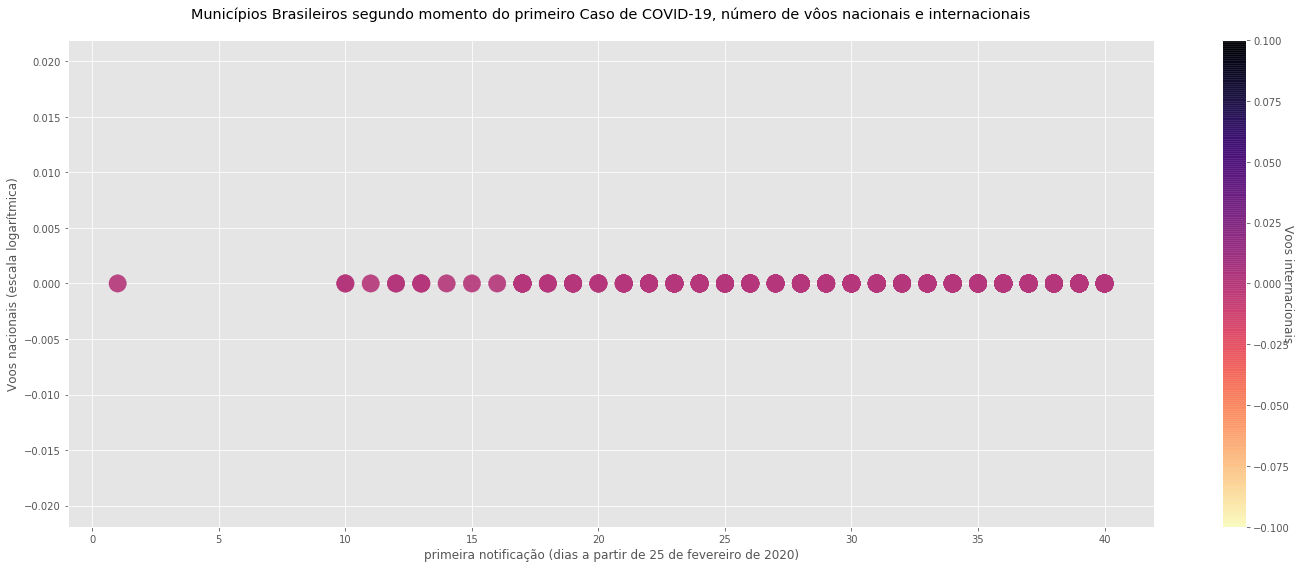

In [317]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('magma')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['peso_integracao_interna'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=df_fatores_geograficos.peso_integracao_geral[filtro_dias],
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo momento do primeiro Caso de COVID-19, número de vôos nacionais e internacionais\n')

teste = plt.colorbar()
teste.set_label('Voos internacionais', rotation=270)
#teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação (dias a partir de 25 de fevereiro de 2020)')
plt.ylabel('Voos nacionais (escala logarítmica)');

plt.tight_layout()
#plt.savefig('covid.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

In [259]:
['cod_mun', 'UF', 'Município', 'pop2019', 'pib2017milreais',
       'export_fob_2019', 'import_fob_2019', 'pip_per_capita17',
       'hierarquia_urbana07', 'hierarquia', 'voos_dom', 'voos_int',
       'indice_proximidade', 'indice_intermediacao', 'cod_mun.1',
       'peso_integracao_interna', 'peso_integracao_geral', 'dia2502',
       'dia2902', 'dia0403', 'dia0503', 'dia0603', 'dia0703', 'dia0803',
       'dia0903', 'dia1003', 'dia1103', 'dia1203', 'dia1303', 'dia1403',
       'dia1503', 'dia1603', 'dia1703', 'dia1803', 'dia1903', 'dia2003',
       'dia2103', 'dia2203', 'dia2303', 'dia2403', 'dia2503', 'dia2603',
       'dia2703', 'dia2803', 'dia2903', 'dia3003', 'dia3103', 'dia0104',
       'dia0204', 'dia0304', 'dia0404', 'dia0504', 'data_primeiro_caso',
       'data_padrao', 'dias_contaminação_referencia']

['cod_mun',
 'UF',
 'Município',
 'pop2019',
 'pib2017milreais',
 'export_fob_2019',
 'import_fob_2019',
 'pip_per_capita17',
 'hierarquia_urbana07',
 'hierarquia',
 'voos_dom',
 'voos_int',
 'indice_proximidade',
 'indice_intermediacao',
 'cod_mun.1',
 'peso_integracao_interna',
 'peso_integracao_geral',
 'dia2502',
 'dia2902',
 'dia0403',
 'dia0503',
 'dia0603',
 'dia0703',
 'dia0803',
 'dia0903',
 'dia1003',
 'dia1103',
 'dia1203',
 'dia1303',
 'dia1403',
 'dia1503',
 'dia1603',
 'dia1703',
 'dia1803',
 'dia1903',
 'dia2003',
 'dia2103',
 'dia2203',
 'dia2303',
 'dia2403',
 'dia2503',
 'dia2603',
 'dia2703',
 'dia2803',
 'dia2903',
 'dia3003',
 'dia3103',
 'dia0104',
 'dia0204',
 'dia0304',
 'dia0404',
 'dia0504',
 'data_primeiro_caso',
 'data_padrao',
 'dias_contaminação_referencia']

In [ ]:
sns.pairplot(df_fatores_geograficos_correlacao)

In [49]:
df_fatores_integracao = df_fatores_integracao.loc[:, ['UF','Município',
    'pop2019', 'pib2017milreais', 'export_fob_2019', 'import_fob_2019',
    'pip_per_capita17', 'hierarquia', 'voos_dom', 'voos_int',
    'indice_proximidade', 'indice_intermediacao', 'peso_integracao_geral'
]]

In [52]:
X = df_fatores_integracao.values[:,2:]

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xsc = sc.fit_transform(X)

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

clst = KMeans(n_clusters=5)
y = clst.fit_predict(Xsc)

In [28]:
df_fatores_integracao['classe_de_integracao'] = y

In [38]:
df_fatores_integracao[df_fatores_integracao['classe_de_integracao'] == 0]

,pop2019,pib2017milreais,export_fob_2019,import_fob_2019,pip_per_capita17,hierarquia,voos_dom,voos_int,indice_proximidade,indice_intermediacao,peso_integracao_geral,classe_de_integracao
1,107863,2296074,38002769,738809,2139,4,0,0,0.417148,0.007206,0.0,0
3,85359,2127523,20514957,53854,2404,4,25,0,0.405658,0.001383,0.0,0
10,51775,1413628,75360555,1469,2530,3,0,0,0.404689,0.001534,0.0,0
11,128969,3026759,75647347,1444659,2281,5,26,0,0.429375,0.003993,0.0,0
16,529544,16514535,124311100,910657971,3179,7,200,0,0.429749,0.010046,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5511,45394,921704,41323,8984,2034,3,0,0,0.422283,0.002728,0.0,0
5516,50065,1673690,90287502,164407,3450,3,0,0,0.334899,0.000047,0.0,0
5520,235647,9498289,1335256935,159717630,4376,5,45,0,0.421724,0.003249,0.0,0
5540,33817,830543,10434197,173279,2508,3,0,0,0.383608,0.001063,0.0,0


In [215]:
df_fatores_geograficos[]

,cod_mun,UF,Município,pop2019,pib2017milreais,export_fob_2019,import_fob_2019,pip_per_capita17,hierarquia_urbana07,hierarquia,...,dia3003,dia3103,dia0104,dia0204,dia0304,dia0404,dia0504,data_primeiro_caso,data_padrao,dias_contaminação_referencia
0,1100015,RO,Alta Floresta D'Oeste,22945,498864,198695,13294,1961,Centro Local,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
1,1100023,RO,Ariquemes,107863,2296074,38002769,738809,2139,Centro Subregional B,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
2,1100031,RO,Cabixi,5312,138894,137660,0,2232,Centro Local,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
3,1100049,RO,Cacoal,85359,2127523,20514957,53854,2404,Centro Subregional B,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
4,1100056,RO,Cerejeiras,16323,448524,97838806,59259,2501,Centro de Zona B,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,GO,Vianópolis,13863,395787,0,0,2894,Centro Local,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
5566,5222054,GO,Vicentinópolis,8743,350765,6518444,0,4177,Centro Local,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
5567,5222203,GO,Vila Boa,6171,137500,0,0,2399,Centro Local,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN
5568,5222302,GO,Vila Propício,5821,182175,0,0,3202,Centro Local,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-02-24,NaN


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler



clrs = ['lightblue', 'red', 'magenta', 'orange', 'green']
for nc in range(2, 6):
    cmap = colors.ListedColormap(clrs[0:nc])

    clst = KMeans(n_clusters=nc)
    y = clst.fit_predict(X)
    
    plt.figure()
    plt.subplot(121)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    plt.scatter(clst.cluster_centers_[:,0], clst.cluster_centers_[:,1], c='black', marker='x', s=50)
    plt.title('{} clusters, silhueta: {}'.format(nc, silhouette_score(X, y)))
    
    plt.subplot(122)
    sil_v = silhouette_samples(X, y)
    xs = 1
    for j in range(0, clst.n_clusters):
        sil_vc = np.sort(sil_v[y == j])
        dom_x = range(xs, xs + len(sil_vc))
        plt.fill_between(dom_x, sil_vc, color=clrs[j])
        plt.scatter(dom_x, sil_vc, s=3, c='black')
        xs = xs + len(sil_vc)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


clrs = ['lightblue', 'red', 'magenta', 'orange', 'green']
for nc in range(2, 6):
    cmap = colors.ListedColormap(clrs[0:nc])

    clst = KMeans(n_clusters=nc)
    y = clst.fit_predict(X)
    
    plt.figure()
    plt.subplot(121)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    plt.scatter(clst.cluster_centers_[:,0], clst.cluster_centers_[:,1], c='black', marker='x', s=50)
    plt.title('{} clusters, silhueta: {}'.format(nc, silhouette_score(X, y)))
    
    plt.subplot(122)
    sil_v = silhouette_samples(X, y)
    xs = 1
    for j in range(0, clst.n_clusters):
        sil_vc = np.sort(sil_v[y == j])
        dom_x = range(xs, xs + len(sil_vc))
        plt.fill_between(dom_x, sil_vc, color=clrs[j])
        plt.scatter(dom_x, sil_vc, s=3, c='black')
        xs = xs + len(sil_vc)

In [50]:
df_fatores_integracao = df_fatores_integracao.loc[:, ['UF','Município',
    'pop2019', 'pib2017milreais','hierarquia', 'voos_dom', 'voos_int',
    'peso_integracao_geral'
]]

In [51]:
X = df_fatores_integracao.values[:,2:]

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xsc = sc.fit_transform(X)

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

clst = KMeans(n_clusters=5)
y = clst.fit_predict(Xsc)

In [43]:
df_fatores_integracao['classe_de_integracao'] = y

In [46]:
df_fatores_integracao[df_fatores_integracao['classe_de_integracao'] == 2]

,pop2019,pib2017milreais,hierarquia,voos_dom,voos_int,peso_integracao_geral,classe_de_integracao
111,2182763,73201651,9,931,68,0.0,2
169,1492745,30238484,9,1009,55,0.0,2
949,2669342,61579403,9,1752,116,0.0,2
1596,1645727,51859618,9,2789,113,0.0,2
2162,2872347,62717483,9,2374,132,0.0,2
2309,2512070,88951168,9,3707,89,0.0,2
3375,1204073,59053563,8,3668,214,0.0,2
4005,1933105,84702357,9,2226,42,0.0,2
4931,1483771,73862306,9,2533,207,0.0,2
5417,1516113,49023142,9,1012,0,0.0,2
